In [1]:
import pandas as pd

data = pd.read_csv("./hightechexportsDATA/hightechexports.csv", skiprows=4)

display(data.head(2))


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.265878e+06,1.255852e+06,2.004844e+06,2.562889e+06,1.655574e+06,1.788242e+06,1.171447e+06,1.735161e+06,NaN,NaN
1,Africa Eastern and Southern,AFE,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.235789e+09,2.960244e+09,2.593774e+09,2.615579e+09,2.216235e+09,2.135146e+09,2.652601e+09,2.753289e+09,NaN,NaN


In [2]:
# Drop columns with all NaN values
data_cleaned = data.dropna(axis=1, how='all')

# Reshape data using pd.melt() to get 'Year' and 'Value' columns
data_long = pd.melt(data_cleaned, 
                    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Value')

# Convert 'Year' column to datetime format
data_long['Year'] = pd.to_datetime(data_long['Year'], format='%Y')

# Keeping only required data
data_long.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

# Display the reshaped data
display(data_long.head())

,Country Name,Year,Value
0,Aruba,2007-01-01,NaN
1,Africa Eastern and Southern,2007-01-01,NaN
2,Afghanistan,2007-01-01,NaN
3,Africa Western and Central,2007-01-01,NaN
4,Angola,2007-01-01,NaN


In [3]:
df = data_long.copy()

# Remove rows where 'Value' is NaN
df = df.dropna(subset=['Value'])

# Filter for years 2017 to 2022
df = df[(df['Year'] >= '2017-01-01') & (df['Year'] <= '2022-12-31')]

# Group by 'Country Name' and calculate the mean export value over these years
country_exports = df.groupby('Country Name')['Value'].mean().reset_index()
country_exports.rename(columns={'Value': 'Exports Last 5 Years (2017 to 2022)'}, inplace=True)

# Calculate thresholds for high, middle, and low export categories
high_threshold = country_exports['Exports Last 5 Years (2017 to 2022)'].quantile(0.67)
low_threshold = country_exports['Exports Last 5 Years (2017 to 2022)'].quantile(0.33)

# Classify countries into categories based on average exports
def categorize_exports(value):
    if value >= high_threshold:
        return 'High Export Country'
    elif value <= low_threshold:
        return 'Low Export Country'
    else:
        return 'Middle Export Country'

country_exports['Category'] = country_exports['Exports Last 5 Years (2017 to 2022)'].apply(categorize_exports)

# Display the resulting dataframe with country names, export averages, and categories
display(country_exports)

,Country Name,Exports Last 5 Years (2017 to 2022),Category
0,Afghanistan,0.000000e+00,Low Export Country
1,Africa Eastern and Southern,2.494437e+09,Middle Export Country
2,Africa Western and Central,4.423511e+08,Middle Export Country
3,Albania,2.424135e+06,Low Export Country
4,Algeria,9.027398e+06,Low Export Country
...,...,...,...
205,Viet Nam,9.869150e+10,High Export Country
206,West Bank and Gaza,8.739651e+06,Low Export Country
207,World,2.947823e+12,High Export Country
208,Zambia,1.897654e+07,Low Export Country


In [4]:
country_exports['Category'].value_counts()

Category
Middle Export Country    72
Low Export Country       69
High Export Country      69
Name: count, dtype: int64

In [5]:
highexportcountries = country_exports[country_exports['Category'] == 'High Export Country']
highexportcountries.sort_values(by='Exports Last 5 Years (2017 to 2022)', ascending=False, inplace=True)
highexportcountries = highexportcountries[~highexportcountries['Country Name'].isin(['World'])]
top_highExport = highexportcountries.head(30)
top_lowExport = highexportcountries.tail(30)
top_highExport

C:\Users\sahil\AppData\Local\Temp\ipykernel_18244\4185193152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highexportcountries.sort_values(by='Exports Last 5 Years (2017 to 2022)', ascending=False, inplace=True)


,Country Name,Exports Last 5 Years (2017 to 2022),Category
81,High income,1.775585e+12,High Export Country
159,Post-demographic dividend,1.663459e+12,High Export Country
147,OECD members,1.367493e+12,High Export Country
85,IBRD only,1.203999e+12,High Export Country
86,IDA & IBRD total,1.196404e+12,High Export Country
130,Middle income,1.164307e+12,High Export Country
116,Low & middle income,1.154832e+12,High Export Country
106,Late-demographic dividend,1.108479e+12,High Export Country
202,Upper middle income,1.000966e+12,High Export Country
62,Europe & Central Asia,8.407000e+11,High Export Country


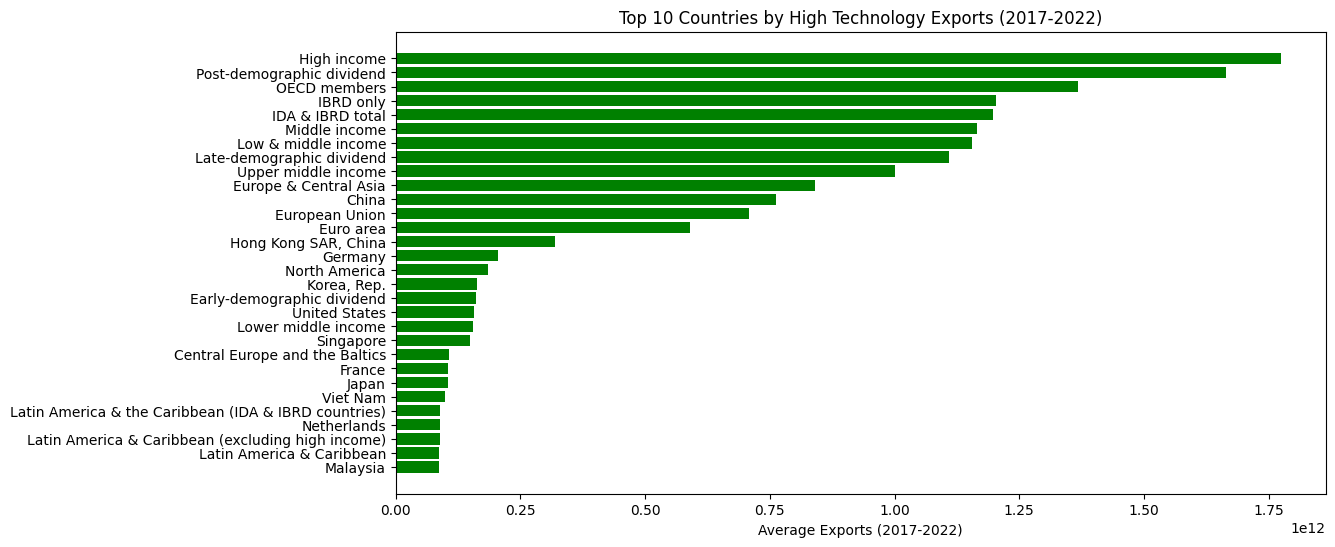

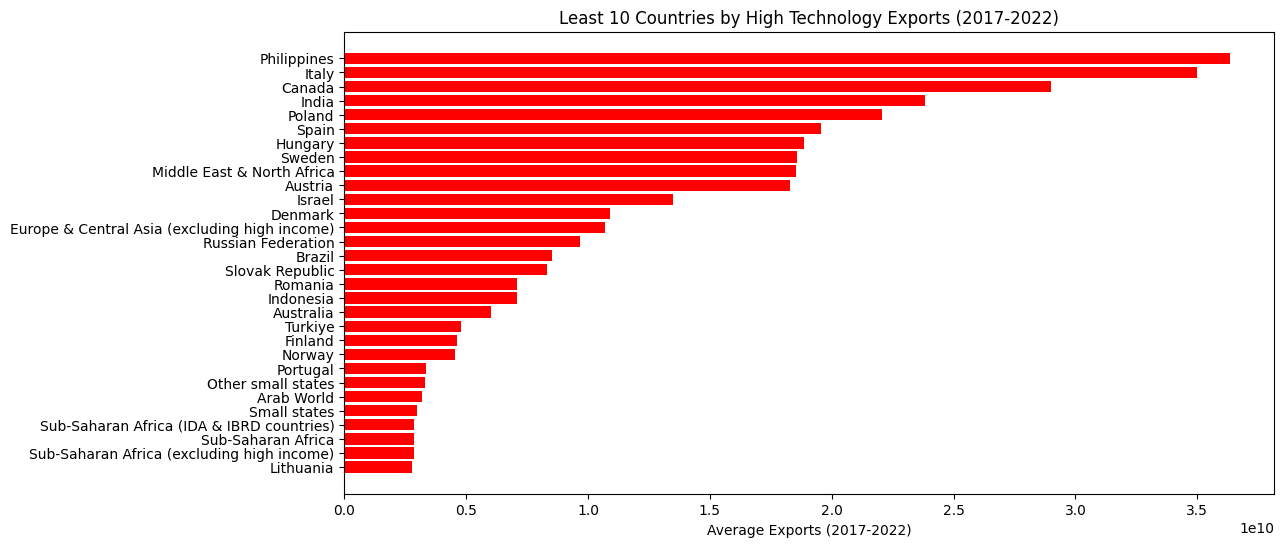

In [6]:
# Bar Plot: Shows average export values per country, with color-coded categories

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top 10 Exporting Countries
plt.figure(figsize=(12, 6))
plt.barh(top_highExport['Country Name'], top_highExport['Exports Last 5 Years (2017 to 2022)'], color='green')
plt.xlabel('Average Exports (2017-2022)')
plt.title('Top 10 Countries by High Technology Exports (2017-2022)')
plt.gca().invert_yaxis()  # Invert y-axis for easier readability
plt.show()

# Plot Least 10 Exporting Countries
plt.figure(figsize=(12, 6))
plt.barh(top_lowExport['Country Name'], top_lowExport['Exports Last 5 Years (2017 to 2022)'], color='red')
plt.xlabel('Average Exports (2017-2022)')
plt.title('Least 10 Countries by High Technology Exports (2017-2022)')
plt.gca().invert_yaxis()  # Invert y-axis for easier readability
plt.show()
